# Actividad 1 Arboles de decisiones

In [2]:
#Se importan las librerias necesarias para el manejo y visualizacion de la actividad
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Se carga la base de datos desde el CSV usando la libreria pandas
dataDF = pd.read_csv("Laboratorio_dataset_car.csv", sep=";")

In [4]:
#Se obtinen los tipos de cada variable y se observa que no hay datos nulos
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Buying       1750 non-null   object
 1   Maintenance  1750 non-null   object
 2   Doors        1750 non-null   object
 3   Person       1750 non-null   object
 4   lug_boot     1750 non-null   object
 5   safety       1750 non-null   object
 6   class        1750 non-null   object
dtypes: object(7)
memory usage: 95.8+ KB


In [5]:
#Se observa 1750 arrows(datos) y 7 Columns(Variables)
dataDF.shape

(1750, 7)

In [6]:
#Se visualiza la base de datos
dataDF.head(3)

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc


In [7]:
#Distribucion de la data en al variable class
dataDF["class"].value_counts()

unacc    1215
acc       390
good       75
vgood      70
Name: class, dtype: int64

In [8]:
#Distribucion de la data en al variable Buying
dataDF["Buying"].value_counts()

vhigh    443
med      438
low      437
high     432
Name: Buying, dtype: int64

In [9]:
#Distribucion de la data en al variable Person
dataDF["Person"].value_counts()

4       587
more    585
2       578
Name: Person, dtype: int64

In [10]:
#Distribucion de la data en al variable safety
dataDF["safety"].value_counts()

high    590
med     582
low     578
Name: safety, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

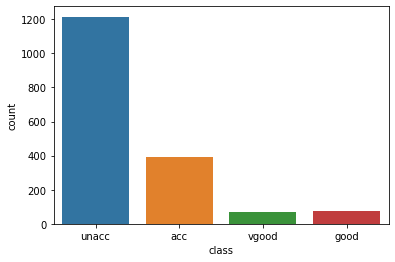

In [11]:
#Se puede observar la distribucion de la data en la variable class
sns.countplot(x="class", data=dataDF)

In [12]:
#Se puede observar que hay una gran cantidad de unacc en la variable class

In [13]:
#Se selecciona la variable target la cual tiene los valores mas distribuidos
target = dataDF["class"]

In [14]:
#Se eliminan algunas variables para una mejor manipulacion de la data y realizar la prueba
dataDF.drop(["class", "Doors", "Maintenance", "lug_boot"], axis = 1, inplace = True)

In [15]:
dataDF.head(2)

,Buying,Person,safety
0,vhigh,2,low
1,vhigh,2,med


In [16]:
#Se convierten las variasbles elegidas para la prueba en variables numericas
dataDF = pd.get_dummies(dataDF)
dataDF.head(3)
dataDF.dtypes

Buying_high     uint8
Buying_low      uint8
Buying_med      uint8
Buying_vhigh    uint8
Person_2        uint8
Person_4        uint8
Person_more     uint8
safety_high     uint8
safety_low      uint8
safety_med      uint8
dtype: object

In [17]:
#El target sigue siendo una variable categorica
target.head(3)

0    unacc
1    unacc
2    unacc
Name: class, dtype: object

In [18]:
#se importa la libreria de KNN, train split y metrics para realizar las pruebas y mostrar resultados
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [19]:
#Se divide el modelo en 70% de los datos en prueba y 30% de los datos en entrenamiento
X_train, X_test, y_train, y_test = train_test_split(dataDF, target, test_size=0.3, random_state=1 )

In [20]:
#se calcula el KNN para saber al presicion del modelo de prueba y entrenamiento
knn = KNeighborsClassifier()
best_knn = knn.fit(X_train,y_train)
print(best_knn.score(X_test, y_test))
print(best_knn.score(X_train, y_train))

0.7847619047619048
0.7877551020408163


In [21]:
#Se importa y se calcula el modelo de presicion con arboles de clasificacion
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [54]:
print(y_pred)
print(y_test)

['acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc'
 'vgood' 'unacc' 'acc' 'unacc' 'acc' 'acc' 'acc' 'unacc' 'unacc' 'unacc'
 'acc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc'
 'acc' 'acc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'vgood' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'acc'
 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'acc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc'
 'unacc' 'acc' 'vgood' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'acc' 'unacc' 'unacc'
 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc'


In [55]:
#Se imprime la exactitud y la matriz de confucion del modelo
print("Accuracy", metrics.accuracy_score(y_test, y_pred))
mconfu = metrics.confusion_matrix(y_test,y_pred)
print(mconfu)

Accuracy 0.8133333333333334
[[ 84   0  27   1]
 [ 24   0   0   1]
 [ 28   0 337   2]
 [ 15   0   0   6]]


In [56]:
#Se importa y se genera una validacion cruzada para ver que tan precisos son el modelo de prueba y de entrenamiento
from sklearn.model_selection import cross_val_score
print(cross_val_score(best_knn, dataDF, target, cv=5))
print(cross_val_score(best_knn, dataDF, target, cv=5).mean())

[0.69428571 0.77714286 0.77142857 0.77714286 0.80285714]
0.7645714285714286


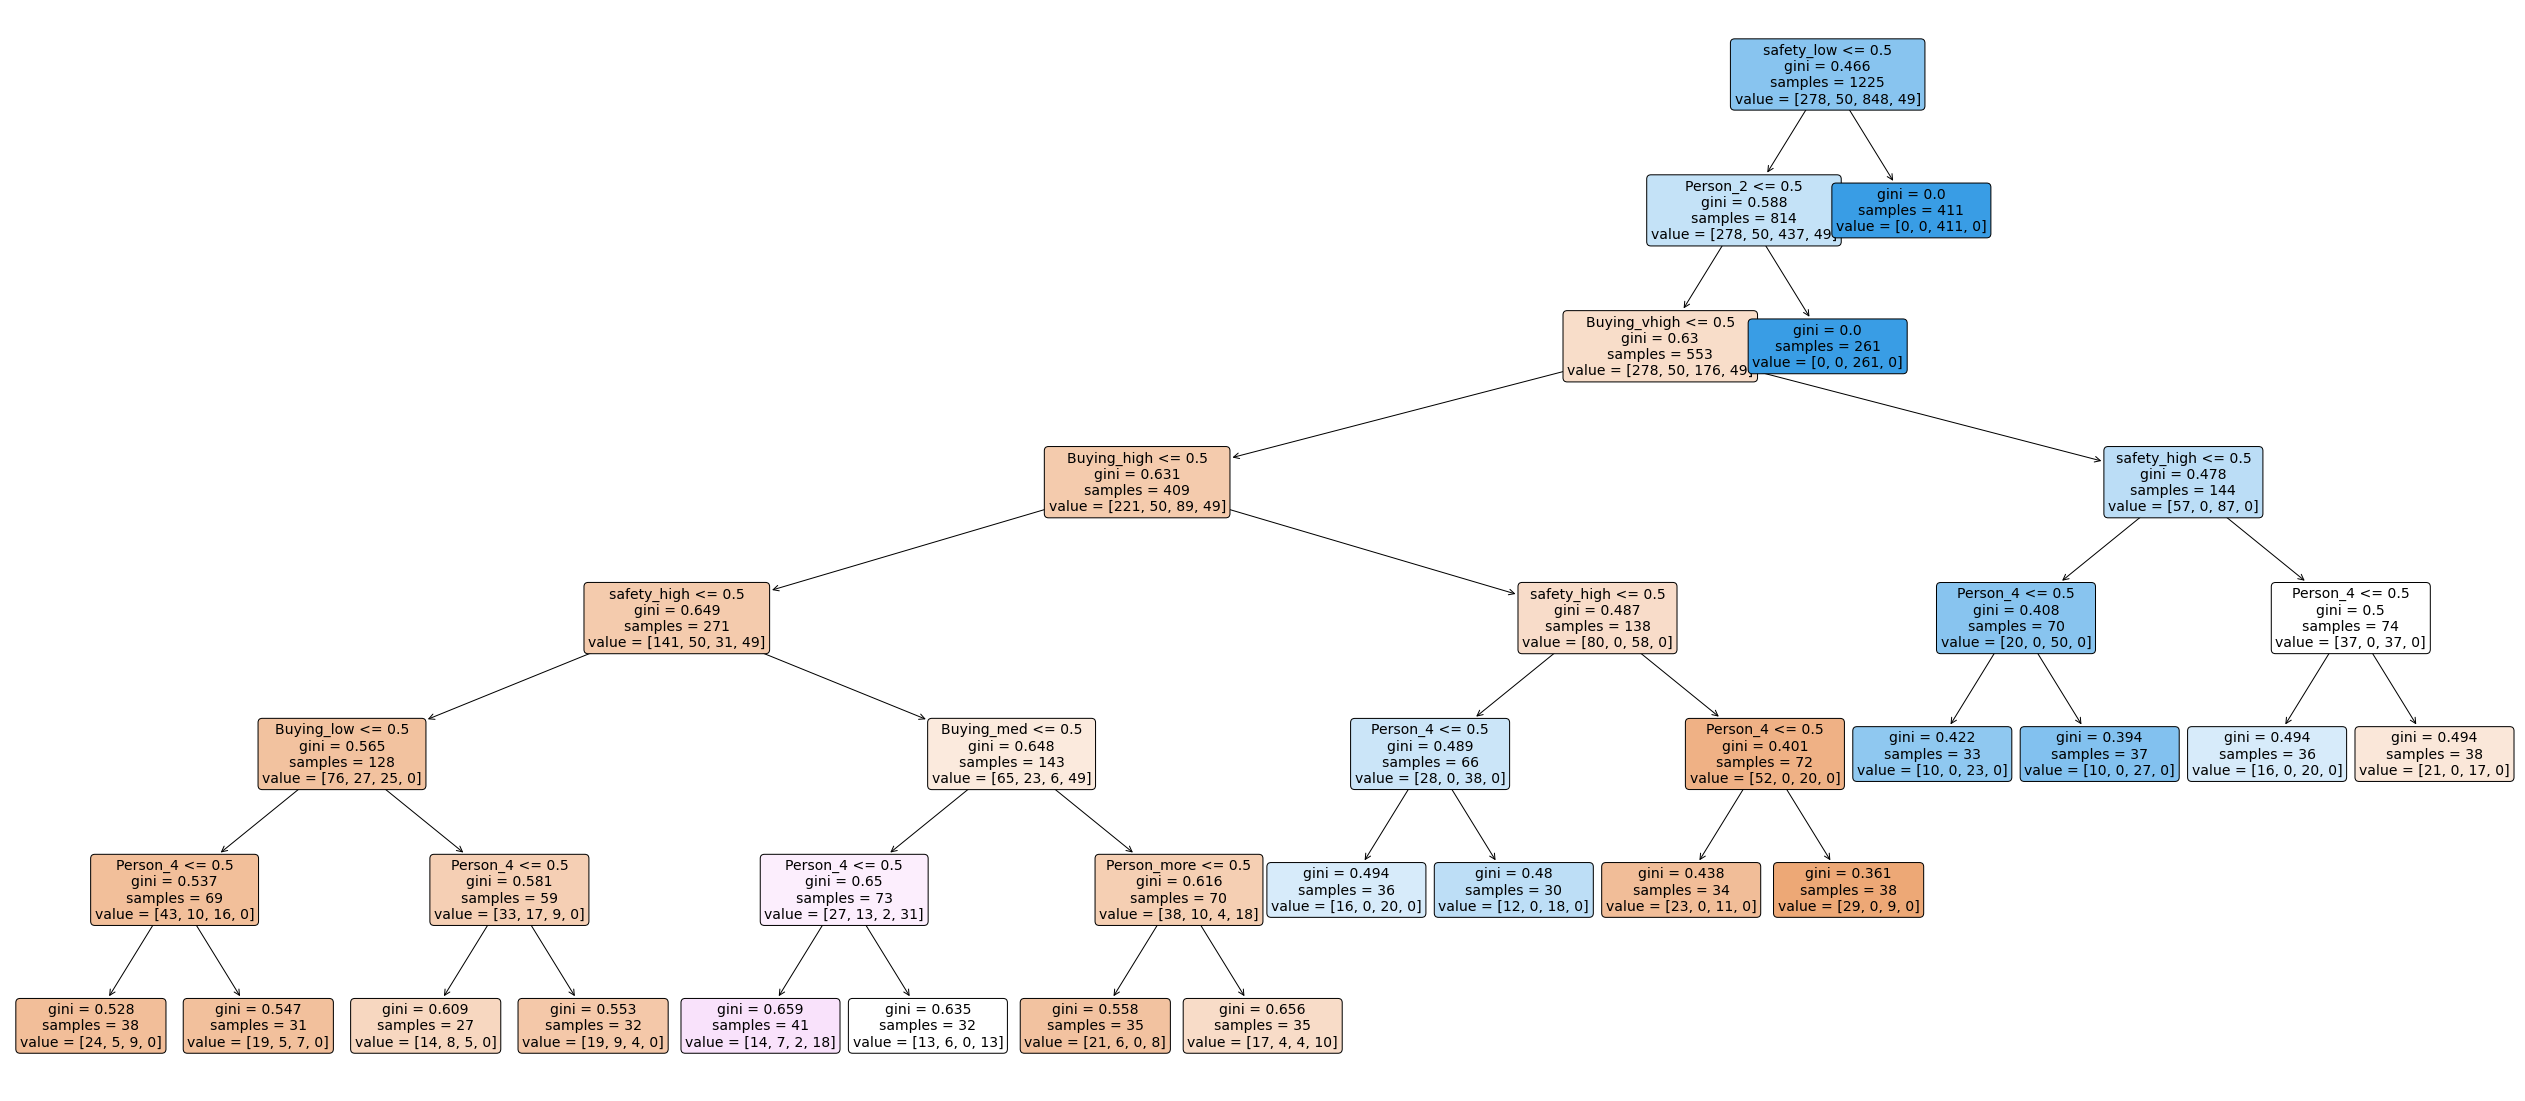

In [57]:
#Se importa y se imprime el arbol de decisiones con sus respectivos valores
from sklearn.tree import plot_tree
dt_feature_names = list(X_train.columns)
plt.figure(figsize=(45,20))
a = plot_tree(clf, feature_names=dt_feature_names, filled=True, rounded=True, fontsize=14)

In [58]:
#Se genera otro modelo utilizando randomForest
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(dataDF, target, test_size=0.3, random_state=1 )
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [59]:
#Resultado final del modelo RandomForest
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.8171428571428572
